In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, cross_validate, GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [13]:
# READ WHAT PROF PUT IN LECTURE 2
# INCLUDE PLOTS
# CHECK THE TEXTBOOK PLOTS FOR CLASSIFICATION
# SHOULD WE USE VAL DATA?

# GRIDSEARCHCV AND CROSS VALIDATION
# FEATURE SELECTION
# ARE THERE FEATURES WE CAN GENERATE
# PIPELINE?

# WRITE SOME STORY ABOUT Metrics (scores) for imbalanced classification being Precision, recall and F1

# REGULARIZATION

# ANSWER GUIDING QUESTIONS

# INCLUDE LINK TO THE REPORT

# MENTION THAT ONE HOT ENCODING WAS DONE


# Drop Age because Age Group is already present

# Include a bar plot of the distribution

<!-- Model selection using cross-validation
Hyperparameter tuning (knob twiddling), synthetic data example

Feature engineering

Feature selection, auto data

Feature scaling, auto data

Feature generation

Polynomial features, auto data

Vectorization/embedding 20newsgroups data

Dimension reduction

Time-series features -->

In [3]:
# Which other models have (ridge and lasso)

In [4]:
df = pd.read_csv('Customer Churn.csv')

In [5]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
categorical_cols = ["Complains", "Age Group", "Tariff Plan", "Status"]

In [8]:
# Convert categorical columns to dummy variables and replace in df
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [9]:
# Check the result
df.head()

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Churn,Complains_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Tariff Plan_2,Status_2
0,8,38,0,4370,71,5,17,30,197.640,0,False,False,True,False,False,False,False
1,0,39,0,318,5,7,4,25,46.035,0,False,True,False,False,False,False,True
2,10,37,0,2453,60,359,24,30,1536.520,0,False,False,True,False,False,False,False
3,10,38,0,4198,66,1,35,15,240.020,0,False,False,False,False,False,False,False
4,3,38,0,2393,58,2,33,15,145.805,0,False,False,False,False,False,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Subscription  Length     3150 non-null   int64  
 2   Charge  Amount           3150 non-null   int64  
 3   Seconds of Use           3150 non-null   int64  
 4   Frequency of use         3150 non-null   int64  
 5   Frequency of SMS         3150 non-null   int64  
 6   Distinct Called Numbers  3150 non-null   int64  
 7   Age                      3150 non-null   int64  
 8   Customer Value           3150 non-null   float64
 9   Churn                    3150 non-null   int64  
 10  Complains_1              3150 non-null   bool   
 11  Age Group_2              3150 non-null   bool   
 12  Age Group_3              3150 non-null   bool   
 13  Age Group_4              3150 non-null   bool   
 14  Age Group_5             

In [11]:
X = df.drop(['Age', 'Churn'], axis = 1)
y = df['Churn']

In [12]:
y.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [15]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn
0    1858
1     347
Name: count, dtype: int64
Churn
0    797
1    148
Name: count, dtype: int64


In [16]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

In [17]:
def refit_high_precision_given_recall(cv_results, recall_threshold=0.80):
    """
    Return index of the model with highest precision among those
    whose recall >= recall_threshold. Tie-break on fastest mean_score_time.
    """
    df = pd.DataFrame(cv_results)

    # Filter by recall threshold
    filtered = df[df["mean_test_recall"] >= recall_threshold]

    if not filtered.empty:
        # Pick highest precision among filtered
        best_prec = filtered["mean_test_precision"].max()
        candidates = filtered[filtered["mean_test_precision"] == best_prec]
        return int(candidates["mean_score_time"].idxmin())

    # Fallback: pick highest recall, then highest precision, then fastest
    best_recall = df["mean_test_recall"].max()
    candidates = df[df["mean_test_recall"] == best_recall]
    best_prec = candidates["mean_test_precision"].max()
    candidates = candidates[candidates["mean_test_precision"] == best_prec]
    return int(candidates["mean_score_time"].idxmin())

# Random Forest

In [18]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[783,  14],
       [ 27, 121]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       797
           1       0.90      0.82      0.86       148

    accuracy                           0.96       945
   macro avg       0.93      0.90      0.91       945
weighted avg       0.96      0.96      0.96       945



In [21]:
model = make_pipeline(RandomForestClassifier(class_weight='balanced'))

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.8809
np.mean(scores['test_recall'])=0.8255
np.mean(scores['test_f1'])=0.8518


In [22]:
# Pipeline
model = make_pipeline(RandomForestClassifier(class_weight='balanced'))

# Parameter grid
param_grid = {
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__max_depth": [None, 1, 3, 5],
    "randomforestclassifier__min_samples_leaf": [1, 5, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=5,
                                        n_estimators=200))])

search.best_params_={'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 200}
best_precision=0.7710
best_recall=0.8870
f1_score(y_test, y_pred)=0.8517
precision_score(y_test, y_pred)=0.7988
recall_score(y_test, y_pred)=0.9122


# Logistic Regression

In [25]:
model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))

[[660 137]
 [ 18 130]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       797
           1       0.49      0.88      0.63       148

    accuracy                           0.84       945
   macro avg       0.73      0.85      0.76       945
weighted avg       0.90      0.84      0.85       945



In [28]:
model = LogisticRegression(max_iter=13000, class_weight='balanced')
scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.5004
np.mean(scores['test_recall'])=0.8784
np.mean(scores['test_f1'])=0.6373


In [29]:
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.4990
np.mean(scores['test_recall'])=0.8808
np.mean(scores['test_f1'])=0.6368


In [30]:
# Pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

# Parameter grid
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced'))])

search.best_params_={'logisticregression__C': 0.01}
best_precision=0.5056
best_recall=0.8836
f1_score(y_test, y_pred)=0.6410
precision_score(y_test, y_pred)=0.4981
recall_score(y_test, y_pred)=0.8986


In [31]:
# Pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

# Parameter grid
param_grid = {
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__solver": ['liblinear'],
    "logisticregression__C": [0.01, 0.1, 1, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

search.best_params_={'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
best_precision=0.5066
best_recall=0.8842
f1_score(y_test, y_pred)=0.6256
precision_score(y_test, y_pred)=0.4818
recall_score(y_test, y_pred)=0.8919


## With PCA

In [32]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), LogisticRegression(class_weight='balanced'))

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced'))])

search.best_params_={'logisticregression__C': 0.01, 'pca__n_components': 10}
best_precision=0.5060
best_recall=0.8842
f1_score(y_test, y_pred)=0.6456
precision_score(y_test, y_pred)=0.5038
recall_score(y_test, y_pred)=0.8986


In [33]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), LogisticRegression(class_weight='balanced'))

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "logisticregression__penalty": ['l1', 'l2'],
    "logisticregression__solver": ['liblinear'],
    "logisticregression__C": [0.01, 0.1, 1, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_

# Evaluate on validation set
y_pred = best_model.predict(X_test)

# display(best_model)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

search.best_params_={'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'pca__n_components': 15}
best_precision=0.5038
best_recall=0.8871
f1_score(y_test, y_pred)=0.6220
precision_score(y_test, y_pred)=0.4815
recall_score(y_test, y_pred)=0.8784


# KNN

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))

[[753  44]
 [106  42]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       797
           1       0.49      0.28      0.36       148

    accuracy                           0.84       945
   macro avg       0.68      0.61      0.63       945
weighted avg       0.82      0.84      0.82       945



In [37]:
model = KNeighborsClassifier()
scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.5404
np.mean(scores['test_recall'])=0.4028
np.mean(scores['test_f1'])=0.4604


In [38]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.8405
np.mean(scores['test_recall'])=0.8061
np.mean(scores['test_f1'])=0.8223


In [39]:
# Pipeline
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Parameter grid
param_grid = {
    "kneighborsclassifier__n_neighbors": np.arange(1, 30, 2)
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

search.best_params_={'kneighborsclassifier__n_neighbors': 3}
best_precision=0.8414
best_recall=0.8131
f1_score(y_test, y_pred)=0.8097
precision_score(y_test, y_pred)=0.8298
recall_score(y_test, y_pred)=0.7905


In [40]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), KNeighborsClassifier())

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "kneighborsclassifier__n_neighbors": np.arange(1, 30, 2)
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

search.best_params_={'kneighborsclassifier__n_neighbors': 3, 'pca__n_components': 15}
best_precision=0.8393
best_recall=0.8125
f1_score(y_test, y_pred)=0.8138
precision_score(y_test, y_pred)=0.8310
recall_score(y_test, y_pred)=0.7973


# SGD Classifier

In [41]:
model = SGDClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))

[[651 146]
 [ 63  85]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       797
           1       0.37      0.57      0.45       148

    accuracy                           0.78       945
   macro avg       0.64      0.70      0.66       945
weighted avg       0.83      0.78      0.80       945



In [44]:
model = SGDClassifier(class_weight='balanced')
scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.3312
np.mean(scores['test_recall'])=0.6836
np.mean(scores['test_f1'])=0.4088


In [45]:
model = make_pipeline(StandardScaler(), SGDClassifier(class_weight='balanced'))

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.4697
np.mean(scores['test_recall'])=0.8549
np.mean(scores['test_f1'])=0.5992


In [46]:
# Pipeline
model = make_pipeline(StandardScaler(), SGDClassifier(class_weight='balanced'))

# Parameter grid
param_grid = {
    "sgdclassifier__penalty": ['l1', 'l2'],
    "sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.01, class_weight='balanced'))])

search.best_params_={'sgdclassifier__alpha': 0.01, 'sgdclassifier__penalty': 'l2'}
best_precision=0.5019
best_recall=0.8727
f1_score(y_test, y_pred)=0.6352
precision_score(y_test, y_pred)=0.5020
recall_score(y_test, y_pred)=0.8649


In [47]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), SGDClassifier(class_weight='balanced'))

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "sgdclassifier__penalty": ['l1', 'l2'],
    "sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.1, class_weight='balanced'))])

search.best_params_={'pca__n_components': 10, 'sgdclassifier__alpha': 0.1, 'sgdclassifier__penalty': 'l2'}
best_precision=0.5076
best_recall=0.8675
f1_score(y_test, y_pred)=0.6400
precision_score(y_test, y_pred)=0.5079
recall_score(y_test, y_pred)=0.8649


In [48]:
# Pipeline
model = make_pipeline(Normalizer(), SGDClassifier(class_weight='balanced'))

# Parameter grid
param_grid = {
    "sgdclassifier__penalty": ['l1', 'l2'],
    "sgdclassifier__alpha": [0.0001, 0.001, 0.01]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('normalizer', Normalizer()),
                ('sgdclassifier', SGDClassifier(class_weight='balanced'))])

search.best_params_={'sgdclassifier__alpha': 0.0001, 'sgdclassifier__penalty': 'l2'}
best_precision=0.3426
best_recall=0.5987
f1_score(y_test, y_pred)=0.4910
precision_score(y_test, y_pred)=0.5271
recall_score(y_test, y_pred)=0.4595


# SVC - Normalize

In [49]:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))

[[482 315]
 [ 17 131]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       797
           1       0.29      0.89      0.44       148

    accuracy                           0.65       945
   macro avg       0.63      0.74      0.59       945
weighted avg       0.86      0.65      0.70       945



In [52]:
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
print(confusion_matrix(y_test, y_pred))

[[676 121]
 [ 32 116]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       797
           1       0.49      0.78      0.60       148

    accuracy                           0.84       945
   macro avg       0.72      0.82      0.75       945
weighted avg       0.88      0.84      0.85       945



In [55]:
# Pipeline
model = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))

# Parameter grid
param_grid = {
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced'))])

search.best_params_={'svc__C': 1, 'svc__kernel': 'rbf'}
best_precision=0.5399
best_recall=0.9275
f1_score(y_test, y_pred)=0.6940
precision_score(y_test, y_pred)=0.5393
recall_score(y_test, y_pred)=0.9730


In [56]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), SVC(class_weight='balanced'))

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('svc', SVC(C=1, class_weight='balanced'))])

search.best_params_={'pca__n_components': 10, 'svc__C': 1, 'svc__kernel': 'rbf'}
best_precision=0.5434
best_recall=0.9205
f1_score(y_test, y_pred)=0.6833
precision_score(y_test, y_pred)=0.5415
recall_score(y_test, y_pred)=0.9257


In [57]:
# Pipeline
model = make_pipeline(Normalizer(), SVC(class_weight='balanced'))

# Parameter grid
param_grid = {
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('normalizer', Normalizer()),
                ('svc', SVC(C=1, class_weight='balanced'))])

search.best_params_={'svc__C': 1, 'svc__kernel': 'rbf'}
best_precision=0.4637
best_recall=0.3390
f1_score(y_test, y_pred)=0.4615
precision_score(y_test, y_pred)=0.5357
recall_score(y_test, y_pred)=0.4054


In [58]:
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[661 136]
 [ 17 131]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       797
           1       0.49      0.89      0.63       148

    accuracy                           0.84       945
   macro avg       0.73      0.86      0.76       945
weighted avg       0.90      0.84      0.85       945



In [61]:
model = make_pipeline(StandardScaler(), LinearSVC(class_weight='balanced'))

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.5013
np.mean(scores['test_recall'])=0.8861
np.mean(scores['test_f1'])=0.6401


In [62]:
# Pipeline
model = make_pipeline(StandardScaler(), LinearSVC(max_iter=3000, class_weight='balanced'))

# Parameter grid
param_grid = {
    "linearsvc__penalty": ['l1', 'l2'],
    "linearsvc__C": [0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.1, class_weight='balanced', max_iter=3000))])

search.best_params_={'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}
best_precision=0.5065
best_recall=0.8877
f1_score(y_test, y_pred)=0.6301
precision_score(y_test, y_pred)=0.4871
recall_score(y_test, y_pred)=0.8919


In [63]:
# Pipeline
model = make_pipeline(StandardScaler(), PCA(), LinearSVC(max_iter=2000, class_weight='balanced'))

# Parameter grid
param_grid = {
    "pca__n_components": [5, 10, 15],
    "linearsvc__penalty": ['l1', 'l2'],
    "linearsvc__C": [0.001, 0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('linearsvc',
                 LinearSVC(C=0.1, class_weight='balanced', max_iter=2000,
                           penalty='l1'))])

search.best_params_={'linearsvc__C': 0.1, 'linearsvc__penalty': 'l1', 'pca__n_components': 15}
best_precision=0.5082
best_recall=0.8877
f1_score(y_test, y_pred)=0.6318
precision_score(y_test, y_pred)=0.4872
recall_score(y_test, y_pred)=0.8986


In [65]:
# Pipeline
model = make_pipeline(Normalizer(), LinearSVC(max_iter=16000, class_weight='balanced'))

# Parameter grid
param_grid = {
    "linearsvc__penalty": ['l1', 'l2'],
    "linearsvc__C": [0.01, 0.1, 1]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('normalizer', Normalizer()),
                ('linearsvc',
                 LinearSVC(C=1, class_weight='balanced', max_iter=16000,
                           penalty='l1'))])

search.best_params_={'linearsvc__C': 1, 'linearsvc__penalty': 'l1'}
best_precision=0.4452
best_recall=0.4738
f1_score(y_test, y_pred)=0.5077
precision_score(y_test, y_pred)=0.4686
recall_score(y_test, y_pred)=0.5541


# Decision Tree

In [66]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred)

array([[773,  24],
       [ 15, 133]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       797
           1       0.85      0.90      0.87       148

    accuracy                           0.96       945
   macro avg       0.91      0.93      0.92       945
weighted avg       0.96      0.96      0.96       945



In [69]:
model = make_pipeline(DecisionTreeClassifier(class_weight='balanced'))

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.8091
np.mean(scores['test_recall'])=0.8234
np.mean(scores['test_f1'])=0.8156


In [70]:
# Pipeline
model = make_pipeline(DecisionTreeClassifier(class_weight='balanced'))

# Parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": [None, 1, 3, 5],
    "decisiontreeclassifier__min_samples_leaf": [1, 5, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced'))])

search.best_params_={'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1}
best_precision=0.7950
best_recall=0.8035
f1_score(y_test, y_pred)=0.8543
precision_score(y_test, y_pred)=0.8377
recall_score(y_test, y_pred)=0.8716


# Gradient Boosting

In [71]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[781,  16],
       [ 37, 111]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       797
           1       0.87      0.75      0.81       148

    accuracy                           0.94       945
   macro avg       0.91      0.86      0.89       945
weighted avg       0.94      0.94      0.94       945



In [74]:
model = make_pipeline(GradientBoostingClassifier())

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.8690
np.mean(scores['test_recall'])=0.7648
np.mean(scores['test_f1'])=0.8128


In [75]:
# Pipeline
model = make_pipeline(GradientBoostingClassifier())

# Parameter grid
param_grid = {
    "gradientboostingclassifier__n_estimators": [100, 200],
    "gradientboostingclassifier__max_depth": [None, 1, 3, 5],
    "gradientboostingclassifier__min_samples_leaf": [1, 5, 10]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=None,
                                            min_samples_leaf=10))])

search.best_params_={'gradientboostingclassifier__max_depth': None, 'gradientboostingclassifier__min_samples_leaf': 10, 'gradientboostingclassifier__n_estimators': 100}
best_precision=0.8690
best_recall=0.8006
f1_score(y_test, y_pred)=0.8592
precision_score(y_test, y_pred)=0.8971
recall_score(y_test, y_pred)=0.8243


# XGBoost

In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
confusion_matrix(y_test, y_pred)

array([[782,  15],
       [ 17, 131]])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       797
           1       0.90      0.89      0.89       148

    accuracy                           0.97       945
   macro avg       0.94      0.93      0.94       945
weighted avg       0.97      0.97      0.97       945



In [79]:
model = make_pipeline(XGBClassifier())

scores = cross_validate(model, X, y, cv=cv,
                            scoring=('precision', 'recall', 'f1'))

print(f"{np.mean(scores['test_precision'])=:.4f}")
print(f"{np.mean(scores['test_recall'])=:.4f}")
print(f"{np.mean(scores['test_f1'])=:.4f}")

np.mean(scores['test_precision'])=0.8949
np.mean(scores['test_recall'])=0.8436
np.mean(scores['test_f1'])=0.8680


In [80]:
# Count class occurrences
counts = y.value_counts()

# Print counts
print(counts)

# Extract positives and negatives
negatives = counts[0]  # retained customers
positives = counts[1]  # churned customers

# Print for reference
print(f"Negatives (0): {negatives}")
print(f"Positives (1): {positives}")


Churn
0    2655
1     495
Name: count, dtype: int64
Negatives (0): 2655
Positives (1): 495


In [81]:
scale_pos_weight = negatives / positives
print(scale_pos_weight)

5.363636363636363


In [83]:
# Pipeline
model = make_pipeline(XGBClassifier())

# Parameter grid
param_grid = {
    "xgbclassifier__n_estimators": [100, 200],
    "xgbclassifier__max_depth": [None, 1, 5, 10],
    "xgbclassifier__lambda": [0, 2, 4],
    "xgbclassifier__alpha": [0, 5, 10],
    "xgbclassifier__scale_pos_weight": [1, scale_pos_weight]
}

# Grid Search
search = GridSearchCV(model, param_grid, scoring=scoring, refit=refit_high_precision_given_recall, cv=cv)
best_model = search.fit(X_train, y_train).best_estimator_
display(best_model)

# Evaluate on validation set
y_pred = best_model.predict(X_test)

best_index = search.best_index_
print(f"{search.best_params_=}")
# print(f"{search.best_score_=:.4f}")
print(f"best_precision={search.cv_results_['mean_test_precision'][best_index]:.4f}")
print(f"best_recall={search.cv_results_['mean_test_recall'][best_index]:.4f}")
print(f"{f1_score(y_test, y_pred)=:.4f}")
print(f"{precision_score(y_test, y_pred)=:.4f}")
print(f"{recall_score(y_test, y_pred)=:.4f}")

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(alpha=0, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device=None, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=4,
                               learning_rate=None, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100, ...))])

search.best_params_={'xgbclassifier__alpha': 0, 'xgbclassifier__lambda': 4, 'xgbclassifier__max_depth': None, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 1}
best_precision=0.8756
best_recall=0.8178
f1_score(y_test, y_pred)=0.9048
precision_score(y_test, y_pred)=0.9110
recall_score(y_test, y_pred)=0.8986


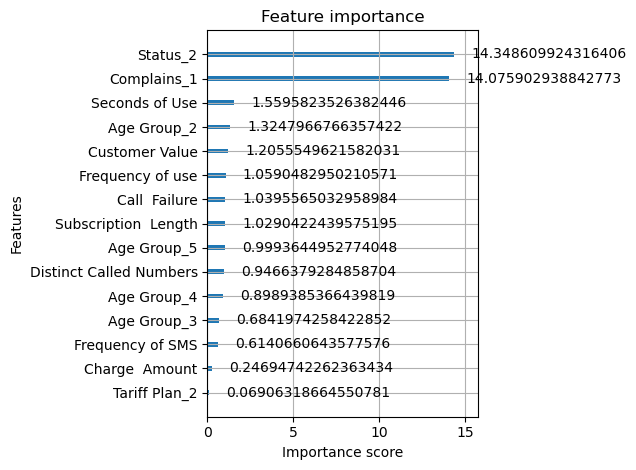

In [89]:
xgb = best_model.named_steps["xgbclassifier"]

plot_importance(xgb, importance_type="gain")
plt.tight_layout()
plt.show()

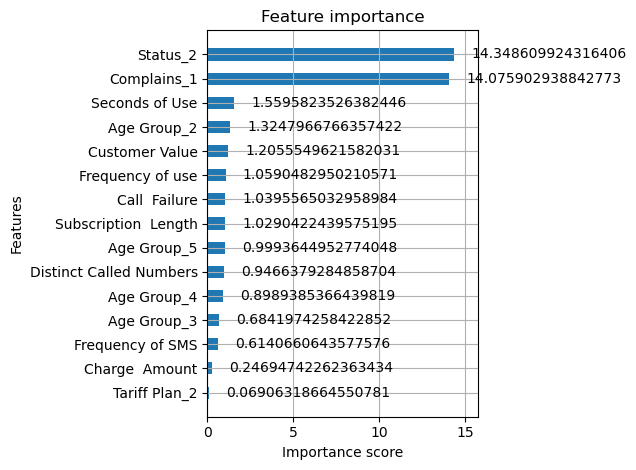

In [90]:
xgb = best_model.named_steps["xgbclassifier"]

plot_importance(xgb, importance_type="gain", height = 0.5)
plt.tight_layout()
plt.show()

# Thresholds

In [93]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict churn probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Try multiple thresholds (increase by 0.1)
thresholds = np.arange(0.0, 1.01, 0.1)
results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_t, zero_division=0)
    recall = recall_score(y_test, y_pred_t, zero_division=0)
    f1 = f1_score(y_test, y_pred_t, zero_division=0)
    results.append([t, precision, recall, f1])

# Create DataFrame
df_thresholds = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1'])

df_thresholds

,Threshold,Precision,Recall,F1
0,0.0,0.156614,1.000000,0.270814
1,0.1,0.768817,0.966216,0.856287
2,0.2,0.835294,0.959459,0.893082
3,0.3,0.858896,0.945946,0.900322
4,0.4,0.869565,0.945946,0.906149
5,0.5,0.910959,0.898649,0.904762
6,0.6,0.917910,0.831081,0.872340
7,0.7,0.933884,0.763514,0.840149
8,0.8,0.953704,0.695946,0.804688
9,0.9,0.969072,0.635135,0.767347


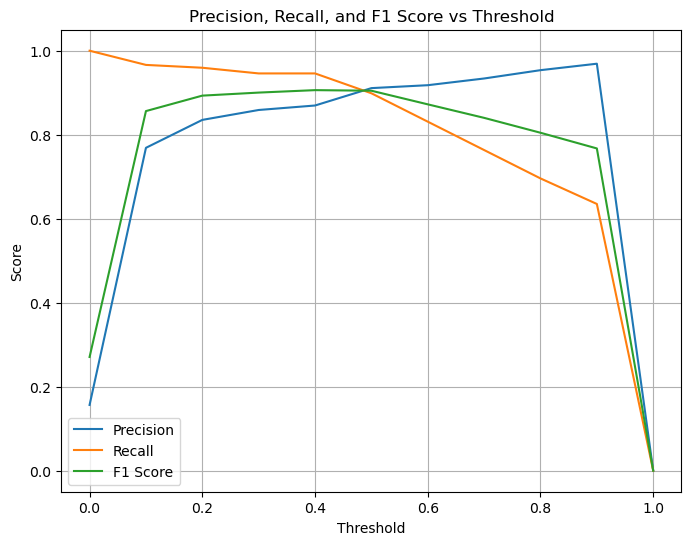

In [95]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_thresholds['Threshold'], df_thresholds['Precision'], label='Precision')
plt.plot(df_thresholds['Threshold'], df_thresholds['Recall'], label='Recall')
plt.plot(df_thresholds['Threshold'], df_thresholds['F1'], label='F1 Score')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

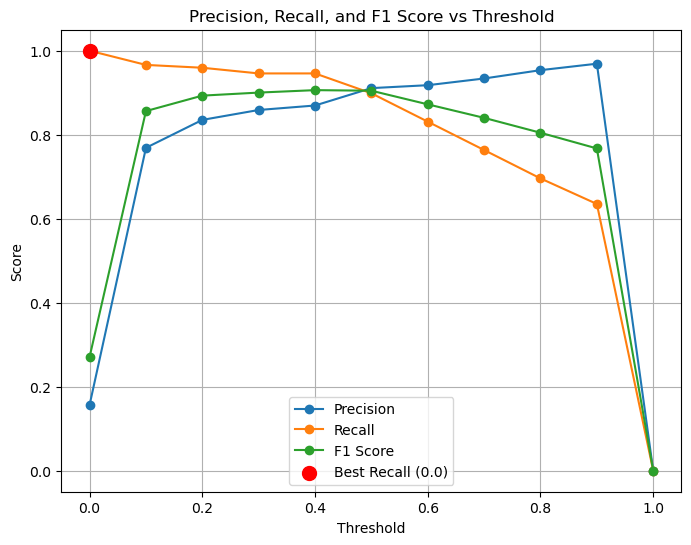

In [96]:
# Find threshold with max recall
best_recall_idx = df_thresholds['Recall'].idxmax()
best_threshold = df_thresholds.loc[best_recall_idx, 'Threshold']
best_recall = df_thresholds.loc[best_recall_idx, 'Recall']

# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_thresholds['Threshold'], df_thresholds['Precision'], marker='o', label='Precision')
plt.plot(df_thresholds['Threshold'], df_thresholds['Recall'], marker='o', label='Recall')
plt.plot(df_thresholds['Threshold'], df_thresholds['F1'], marker='o', label='F1 Score')

# Highlight best recall point
plt.scatter(best_threshold, best_recall, color='red', s=100, zorder=5, label=f'Best Recall ({best_threshold:.1f})')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Cost-based threshold (tau): 0.1667
Precision@tau: 0.7978 | Recall@tau: 0.9595 | F1@tau: 0.8712


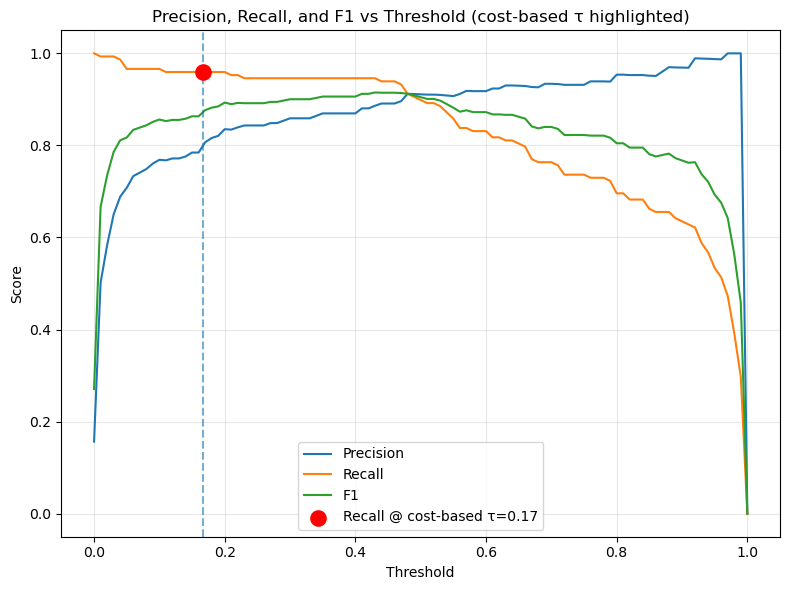

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 1) Get churn probabilities from your best model
y_proba = best_model.predict_proba(X_test)[:, 1]

# 2) Define costs and compute Bayes-optimal threshold (scale-invariant; only ratio matters)
C_FP = 1.0   # retention cost (false positive)
C_FN = 5.0   # acquisition cost (false negative) -> 5x higher
tau = C_FP / (C_FP + C_FN)   # = 1 / (1+5) = 0.1667

# 3) Evaluate metrics across thresholds (fine grid) for plotting
thresholds = np.arange(0.0, 1.001, 0.01)
rows = []
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    rows.append([
        t,
        precision_score(y_test, y_pred_t, zero_division=0),
        recall_score(y_test, y_pred_t, zero_division=0),
        f1_score(y_test, y_pred_t, zero_division=0),
    ])
df_thresholds = pd.DataFrame(rows, columns=['Threshold', 'Precision', 'Recall', 'F1'])

# 4) Compute metrics at the cost-based threshold tau
y_pred_tau = (y_proba >= tau).astype(int)
prec_tau = precision_score(y_test, y_pred_tau, zero_division=0)
rec_tau  = recall_score(y_test, y_pred_tau, zero_division=0)
f1_tau   = f1_score(y_test, y_pred_tau, zero_division=0)

print(f"Cost-based threshold (tau): {tau:.4f}")
print(f"Precision@tau: {prec_tau:.4f} | Recall@tau: {rec_tau:.4f} | F1@tau: {f1_tau:.4f}")

# 5) Plot curves + highlight recall at tau
plt.figure(figsize=(8, 6))
plt.plot(df_thresholds['Threshold'], df_thresholds['Precision'], label='Precision')
plt.plot(df_thresholds['Threshold'], df_thresholds['Recall'], label='Recall')
plt.plot(df_thresholds['Threshold'], df_thresholds['F1'], label='F1')

# point for recall at tau
plt.scatter([tau], [rec_tau], s=120, color='red', zorder=5,
            label=f'Recall @ cost-based τ={tau:.2f}')

# vertical line at tau (optional, helps visually)
plt.axvline(tau, linestyle='--', alpha=0.6)

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 vs Threshold (cost-based τ highlighted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()